In [428]:
import os
import pandas as pd
import numpy as np
os.getcwd()

'c:\\Users\\DELL\\Desktop\\ISB_Screening Test'

In [429]:
# Loading the Data
gsp_status = pd.read_csv('GSP_Products01.csv')
us_imports = pd.read_csv('Imports_01.csv')

In [430]:
# View the top few rows of GSP Data
gsp_status.head()

,HTS\nNumber,"""Brief Description""",MFN Rate,GSP\nStatus
0,0106.31.00,Live birds of prey,1.80%,A
1,0106.32.00,"Live psittaciforme birds (including parrots, p...",1.80%,A
2,0106.33.00,Ostriches; emus,1.80%,A
3,0106.39.01,"Live birds, other than poultry, birds of prey ...",1.80%,A
4,0202.30.02,"High-qual. beef cuts, boneless, processed, fro...",4%,A


In [431]:
# Rename Column Names of GSP Data
gsp_status.rename(columns = {"HTS\nNumber": "HTS Number","GSP\nStatus":"GSP Status","\"Brief Description\"":"Brief Description"},inplace=True)

In [432]:
#drop duplicates in GSP Data
gsp_status.drop_duplicates(subset ="HTS Number",keep = False, inplace = True)
len(gsp_status)

3318

In [433]:
# Modify gsp_status, to clean the HTS Numbers and add a new column HTS Global
hts = gsp_status.iloc[:,0]
hts_new_8dig=[]
for i in hts:
    i = str(i)
    i = i.replace(".","")
    i_8dig = i[0:8]
    hts_new_8dig.append(i_8dig)
    hts_new.append(i)
gsp_status.insert(loc=1,column = "HTS Global",value=hts_new_8dig)

In [434]:
# View GSP Status final cleaned data
gsp_status

,HTS Number,HTS Global,Brief Description,MFN Rate,GSP Status
0,0106.31.00,01063100,Live birds of prey,1.80%,A
1,0106.32.00,01063200,"Live psittaciforme birds (including parrots, p...",1.80%,A
2,0106.33.00,01063300,Ostriches; emus,1.80%,A
3,0106.39.01,01063901,"Live birds, other than poultry, birds of prey ...",1.80%,A
4,0202.30.02,02023002,"High-qual. beef cuts, boneless, processed, fro...",4%,A
...,...,...,...,...,...
3617,9620.00.25,96200025,"Monopods, bipods, tripods and similar articles...",3.90%,A
3618,9620.00.30,96200030,"Monopods, bipods, tripods and similar articles...",The rate applicable to the article of which it...,A
3621,9620.00.55,96200055,"Monopods, bipods, tripods and similar articles...",3.30%,A
3622,9620.00.65,96200065,"Monopods, bipods, tripods and similar articles...",2.90%,A


In [435]:
# Modify us_imports, to clean the HTS Code and add a new column HTS Global
us_hts = us_imports.iloc[:,0]
us_hts_new = []
for i in us_hts:
    i = str(i)
    i = i[0:8]
    us_hts_new.append(i)

us_imports.insert(loc=1, column = "HTS Global", value = us_hts_new)
us_imports


,HS CODE 10 DIGIT,HTS Global,2004,2005,2006,2007,2008,2009,2010,2011,...,2010.1,2011.1,2012.1,2013.1,2014.1,2015.1,2017.1,2018.1,2019 through January.1,2016.1
0,101100010,10110001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,101100020,10110002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,101110010,10111001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,101110020,10111002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,101190010,10119001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30303,9818000700,98180007,"10,583","66,314","64,907","70,585","36,488","35,294","38,186","30,576",...,"38,186","30,576","21,027","3,400","29,613","76,842","1,38,175","1,14,627","4,277","65,027"
30304,9999001000,99990010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30305,9999001500,99990015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30306,9999002000,99990020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [436]:
# Check 1 = If any HS code is being converted to date time format. To avoid this, data converted to csv format.

#gsp_status.head()
#us_imports.head()
check = gsp_status["HTS Global"]
for i in check:
    if len(str(i)) == 8:
        continue
    else:
        print("Alert at {}".format(i))


In [437]:
# View the columns in Import Data. Duplicate Columns Exist.
us_imports.columns

Index(['HS CODE 10 DIGIT', 'HTS Global', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2017',
       '2018', '2019 through January', '2016', '2004.1', '2005.1', '2006.1',
       '2007.1', '2008.1', '2009.1', '2010.1', '2011.1', '2012.1', '2013.1',
       '2014.1', '2015.1', '2017.1', '2018.1', '2019 through January.1',
       '2016.1'],
      dtype='object')

In [438]:
# Remove Duplicate Columns in Indian Export (US Import Data)

us_imports_cleaned = us_imports.T.drop_duplicates().T

# Relocate 2016 column, so that the column arrangement is year wise.

col_2016 = us_imports_cleaned.pop("2016")
us_imports_cleaned.insert(14,"2016",col_2016)
#us_imports_cleaned


In [439]:
# View Cleaned Data
us_imports_cleaned

,HS CODE 10 DIGIT,HTS Global,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019 through January
0,101100010,10110001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,101100020,10110002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,101110010,10111001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,101110020,10111002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,101190010,10119001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30303,9818000700,98180007,"10,583","66,314","64,907","70,585","36,488","35,294","38,186","30,576","21,027","3,400","29,613","76,842","65,027","1,38,175","1,14,627","4,277"
30304,9999001000,99990010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30305,9999001500,99990015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30306,9999002000,99990020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [440]:
## Check if any rows are completely NaN i.e., If there is no trade in that specific commodity, then delete such rows.
years = us_imports_cleaned.columns[2:18]
us_imports_cleaned = us_imports_cleaned.dropna(subset=years,how='all')
us_imports_cleaned_indexed = us_imports_cleaned.reset_index(drop = True)
# Fill NaN values with zero, in data points where there is no trade in a particular year
us_imports_cleaned_indexed = us_imports_cleaned_indexed.fillna(0)
#us_imports_cleaned_indexed

#After the process, we see that only 17038 rows are left, i.e., the rest of the commodities have not been traded in the given time period. So, we exclude them from the dataset.


In [441]:
# Drop unnecessary axis
us_imports_cleaned_indexed.drop("HS CODE 10 DIGIT",axis=1,inplace=True)
us_imports_cleaned_indexed

,HTS Global,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019 through January
0,10129009,0,0,0,0,0,0,0,0,0,0,"20,000",0,0,"3,064",0,0
1,10130000,0,0,0,0,0,0,0,0,0,0,0,"21,083",0,0,0,0
2,10190109,"10,000","30,000",0,"50,000",0,"65,000","4,503","20,000",0,0,0,0,0,0,0,0
3,10619909,0,0,0,"1,04,000",0,0,0,"25,000",0,0,0,0,0,0,0,0
4,10619912,0,0,0,0,0,0,0,0,"11,000","4,300",0,0,"13,000","5,000",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17033,98170050,"2,74,225","33,033","16,73,809","3,38,668","3,78,569","2,81,219","2,39,761","9,74,898","1,89,240","3,03,676","8,85,531","3,04,851","9,26,800","9,91,584","13,40,079","1,42,387"
17034,98170060,"3,23,551","13,00,449","13,38,144","20,98,894","43,44,332","18,94,341","16,11,057","21,89,089","16,90,590","27,66,882","19,57,651","17,61,810","12,06,081","16,54,137","17,92,565","81,851"
17035,98180005,0,0,0,0,"4,817",0,0,0,0,0,0,0,0,0,0,0
17036,98180007,"10,583","66,314","64,907","70,585","36,488","35,294","38,186","30,576","21,027","3,400","29,613","76,842","65,027","1,38,175","1,14,627","4,277"


In [442]:
# Convert format of export value from str to float, and also remove commas
# This is being done to perform mathematical operations on the export values
for i in us_imports_cleaned_indexed.columns[1:]:
    us_imports_cleaned_indexed[i] = us_imports_cleaned_indexed[i].str.replace(',', '').astype(float)
#us_imports_cleaned_indexed

In [443]:
# Group data by 8 Digit HS Code and then vertically sum the export values 
us_imports_cleaned_indexed_grouped = us_imports_cleaned_indexed.groupby('HTS Global').sum()
#us_imports_cleaned_indexed_grouped

In [444]:
# Resetting index
us_imports_cleaned_indexed_grouped.reset_index(inplace=True)
us_imports_cleaned_indexed_grouped

,HTS Global,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019 through January
0,10011900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7885.0,0.0,37675.0,0.0
1,10019020,0.0,0.0,0.0,0.0,2604.0,25201.0,0.0,12188.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10019900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20261.0,61064.0,26723.0,9167.0
3,10030040,0.0,0.0,0.0,0.0,0.0,2474.0,2120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10031000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3163.0,5536.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10341,98170050,274225.0,33033.0,1673809.0,338668.0,378569.0,281219.0,239761.0,974898.0,189240.0,303676.0,885531.0,304851.0,926800.0,991584.0,1340079.0,142387.0
10342,98170060,323551.0,1300449.0,1338144.0,2098894.0,4344332.0,1894341.0,1611057.0,2189089.0,1690590.0,2766882.0,1957651.0,1761810.0,1206081.0,1654137.0,1792565.0,81851.0
10343,98180005,0.0,0.0,0.0,0.0,4817.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10344,98180007,10583.0,66314.0,64907.0,70585.0,36488.0,35294.0,38186.0,30576.0,21027.0,3400.0,29613.0,76842.0,65027.0,138175.0,114627.0,4277.0


In [445]:
# Final check for any duplicates. 
us_imports_cleaned_indexed_grouped.drop_duplicates(subset = "HTS Global", keep = False, inplace = True)
#No duplicateds found

The Data has been cleaned up, and two clean datasets us_imports_cleaned_indexed_grouped and gsp_status have been created.

In [446]:
# A* GSP status for India in 71131150, 71131929, 71131950 = So, excluding them, from GSP list, as India is not eligible for GSP status for these HTS codes
# Reference : General Notes PDF from USTR website - Pages 14 to 17 - Point 4(d). PDF included in the folder.

gsp_temp = gsp_status.set_index('HTS Global')
gsp_temp.drop(['71131150','71131929','71131950'],inplace=True)
gsp_temp.reset_index()
gsp_status_cleaned = gsp_temp
#gsp_status_cleaned.loc['71131150'] ## Check i.e., error -> rows have been deleted

In [447]:
#  Match HTS Global in Import Data and GSP Data by merging data sets
common = us_imports_cleaned_indexed_grouped.merge(gsp_status_cleaned, on = "HTS Global",how="inner")
common.drop(["HTS Number"],axis=1,inplace=True)
col_reposition1 = common.pop("Brief Description")
col_reposition2 = common.pop("MFN Rate")
col_reposition3 = common.pop("GSP Status")
common.insert(1,"Brief Description",col_reposition1)
common.insert(2,"MFN Rate",col_reposition2)
common.insert(3,"GSP Status",col_reposition3)
common


,HTS Global,Brief Description,MFN Rate,GSP Status,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019 through January
0,10059020,Yellow dent corn,0.05 cents/kg,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,684033.0,2651736.0,302825.0,0.0,549500.0,0.0
1,10059040,"Corn (maize), other than seed and yellow dent ...",0.25 cents/kg,A*,0.0,0.0,0.0,0.0,0.0,0.0,2352.0,0.0,3610.0,7213.0,0.0,11700.0,46188.0,0.0,0.0,0.0
2,10063010,"Rice semi-milled or wholly milled, whether or ...",11.20%,A,521549.0,714572.0,1135052.0,2340911.0,4854240.0,4846500.0,6775952.0,4235523.0,7917971.0,11651355.0,5278995.0,4953460.0,6702007.0,6941300.0,8054600.0,747914.0
3,10071000,"Grain sorghum, seed",0.22 cents/kg,A*,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4478.0,0.0
4,10079000,"Grain sorghum, other than seed",0.22 cents/kg,A*,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2765.0,0.0,0.0,7165.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2592,96190005,"Sanitary napkins and tampons, diapers and diap...",5%,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8986.0,7430.0,23562.0,0.0,0.0,0.0,0.0
2593,96190090,Other sanitary included articles of textile ma...,7%,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1080963.0,729993.0,0.0,3200.0,0.0,0.0,6792.0,0.0
2594,96200030,"Monopods, bipods, tripods and similar articles...",The rate applicable to the article of which it...,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3300.0,14360.0,0.0
2595,96200065,"Monopods, bipods, tripods and similar articles...",2.90%,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2606.0,0.0,0.0


In [448]:
# Separating products with GSP status as A and A* 
data_onlya = common[common['GSP Status']=="A"].reset_index()
data_onlyastar = common[common['GSP Status']=="A*"]
data_onlya

,index,HTS Global,Brief Description,MFN Rate,GSP Status,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019 through January
0,0,10059020,Yellow dent corn,0.05 cents/kg,A,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,684033.0,2651736.0,302825.0,0.0,549500.0,0.0
1,2,10063010,"Rice semi-milled or wholly milled, whether or ...",11.20%,A,521549.0,714572.0,1135052.0,2340911.0,4854240.0,...,6775952.0,4235523.0,7917971.0,11651355.0,5278995.0,4953460.0,6702007.0,6941300.0,8054600.0,747914.0
2,5,11022000,Corn (maize) flour,0.3 cents/kg,A,7819.0,2488.0,27572.0,65015.0,63420.0,...,27121.0,48879.0,59327.0,36049.0,605952.0,760964.0,822556.0,573645.0,542547.0,18811.0
3,6,11029025,Rice flour,0.09 cents/kg,A,0.0,0.0,0.0,358927.0,708409.0,...,1026712.0,752099.0,810527.0,1246749.0,1291832.0,1902418.0,1617906.0,3567865.0,5439438.0,120745.0
4,8,11029060,"Cereal flours, other than of wheat or meslin, ...",9%,A,125604.0,224109.0,554554.0,915429.0,1015808.0,...,554997.0,471829.0,882569.0,777581.0,923615.0,990513.0,1101046.0,1370801.0,2644448.0,203273.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2418,2592,96190005,"Sanitary napkins and tampons, diapers and diap...",5%,A,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8986.0,7430.0,23562.0,0.0,0.0,0.0,0.0
2419,2593,96190090,Other sanitary included articles of textile ma...,7%,A,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1080963.0,729993.0,0.0,3200.0,0.0,0.0,6792.0,0.0
2420,2594,96200030,"Monopods, bipods, tripods and similar articles...",The rate applicable to the article of which it...,A,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3300.0,14360.0,0.0
2421,2595,96200065,"Monopods, bipods, tripods and similar articles...",2.90%,A,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2606.0,0.0,0.0


In [449]:
# Total Export calculation for year 2018
print("The export value considering all GSP products is ${} billion".format(common["2018"].sum()*(10**-9)))
print("The export value considering only products with GSP status A is ${} billion".format(data_onlya["2018"].sum()*(10**-9)))

The export value considering all GSP products is $7.965781903000001 billion
The export value considering only products with GSP status A is $6.225760352 billion


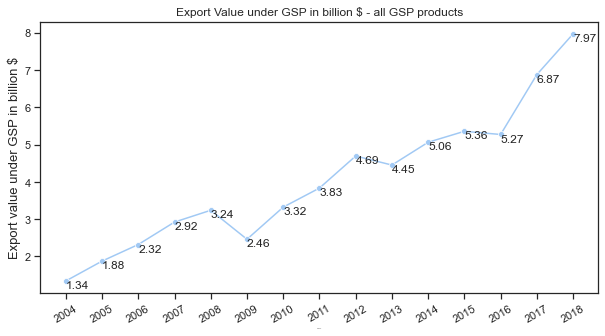

In [450]:
# Plotting export values considering all GSP products for all years
def plot_exportvalue(dataset):
    import seaborn as sns
    import matplotlib.pyplot as plt
    temp_sum=[]
    for s in dataset.columns[4:19]:
        temp = dataset[s]
        temp_sum1 = temp.sum()*(10**-9)
        temp_sum.append(temp_sum1)
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.set_theme(style="ticks",palette="pastel")
    sns.lineplot(x = dataset.columns[4:19],y=temp_sum,marker='o')
    plt.ylabel("Export value under GSP in billion $",fontsize=13)
    plt.xlabel("Year",fontsize=2)
    plt.xticks(rotation=30)
    plt.title("Export Value under GSP in billion $ - all GSP products")
    for x,y in zip(dataset.columns[4:19],temp_sum):
        y = round(y,2)
        plt.text(x,y-0.2,y)
    plt.show()

plot_exportvalue(common)

**Tariff Footprint**

In [451]:
# Function for calculating total tariff in USD based on the MFN tariff for each product.

def Tariff_Amount_2018(common):
    import regex as re
    k =0 ; mfn_as_rate=[]
    while k < len(common):
        rate = common["MFN Rate"][k]
        check = re.findall("\A(\d+(\.\d+)?%)", rate)
        check2 = re.findall("[a-z]", rate)
        if check and not check2:
            mfn_as_rate.append("mfn_yes")
        else:
            mfn_as_rate.append("mfn_no")
        k+=1
    common["mfn_as_rate"]=mfn_as_rate

    ## Splitting products for which MFN Rates are available for calculation as % .Tariff can be calculated only for these.
    ## Products for which MFN Rates not available, the tariff cannot be calculated with the available data.
    grouping_temp = common.groupby(mfn_as_rate)    
    new_groups = [grouping_temp.get_group(x) for x in grouping_temp.groups]
    masterdata_mfn_yes = new_groups[1].reset_index()
    masterdata_mfn_no = new_groups[0].reset_index()
    print("Tariff Benefit amount cannot be calculated for {} products, as the MFN rate is not available as absolute %".format(len(masterdata_mfn_no)))

    ## Tariff Calculation for each commodity for year 2018

    g = 0; tariff= [ ]
    while g < len(masterdata_mfn_yes['MFN Rate']):
        tariff_temp = (float(masterdata_mfn_yes['MFN Rate'][g].rstrip('%'))/100)*(masterdata_mfn_yes['2018'][g])
        tariff.append(tariff_temp)
        g+=1
    masterdata_mfn_yes["Tariff_2018"]=tariff

    return(masterdata_mfn_yes["Tariff_2018"].sum()*(10**-6))


In [452]:
# Calculating tariff benefit for 2018 due to GSP for all products
Tariff_Amount_2018(common)

Tariff Benefit amount cannot be calculated for 165 products, as the MFN rate is not available as absolute %


307.45516037199997

In [453]:
# Calculating tariff benefit for 2018 due to GSP for products only with GSP status A
Tariff_Amount_2018(data_onlya)

Tariff Benefit amount cannot be calculated for 154 products, as the MFN rate is not available as absolute %


247.924816077